In [200]:
%pylab inline
import warnings
warnings.filterwarnings('ignore')

Populating the interactive namespace from numpy and matplotlib


In [201]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [202]:
# Displaying max-height of 8000 px without scrolling, for cleaner visual representation
# source : stackoverflow
# https://stackoverflow.com/questions/18770504/resize-ipython-notebook-output-window

In [203]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:2000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

In [204]:
%%time

# Loading libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
# nltk.download('stopwords')

# pip install tqdm
from tqdm import tqdm_notebook as tqdm

from collections import Counter

Wall time: 0 ns


In [207]:
# Loading data-set : reviews dataset with reviews of length 100-200 for restaurants ONLY.

In [209]:
%%time

# check what is low -memory parameter ??
# COMPLETE REVIEWS FOR RESTAURANTS - ALL REVIEW WORD LENGTH

# col_names = ['review_id', 'business_id', 'user_id', 'text', 'stars', 'text length']

reviews_dataset = pd.read_csv('reviews_restaurants_text.csv', low_memory= False)
display(reviews_dataset.head())

,review_id,business_id,user_id,text,stars
0,8oFUMhJ7fR2-X3We9TiK7g,kfo1hXvNtGGThfrZGaWtVw,tL2pS5UOmN6aAOi3Z-qFGg,"b""I've been here a few times over the years. I...",4
1,xryg94pDLOO71veGcQINuQ,dfRAK2mgdHbL2_YsFqtCdQ,tL2pS5UOmN6aAOi3Z-qFGg,"b""I used to come here back in the 90s when thi...",1
2,adNS6X4TnaxuFFxzoezGzg,So132GP_uy3XbGs0KNyzyw,tL2pS5UOmN6aAOi3Z-qFGg,"b""I've eaten here a couple of times. Great foo...",5
3,JyOWXyxpN0PmPAF3OXkfCQ,cZBCVzd4lg_jx8IiFz-Iag,tL2pS5UOmN6aAOi3Z-qFGg,"b""Have grabbed a quick bite to eat hear many t...",4
4,ClB81WvkDJwDnHN6evg84w,WzkbnhI-fxdH_tMzT3evtA,tL2pS5UOmN6aAOi3Z-qFGg,b'This is one of the best bars in town. Not ma...,5


Wall time: 723 ms


In [210]:
# reviews_dataset.shape[0] - gives number of row count
print("Total No. of Reviews: {}".format(reviews_dataset.shape[0]))

Total No. of Reviews: 154737


In [211]:
reviews_dataset.shape

(154737, 5)

In [212]:
import string
def get_clean_text(text):
    
    '''
    Takes in a string of text, then performs the following:
    1. Performs case normalization
    2. Remove all punctuation
    3. Remove all stopwords
    4. Return the cleaned text as a list of words
    '''
    stopwords = nltk.corpus.stopwords.words('english')
    newStopWords = ['ive','hadnt','couldnt','didnt', 'id']  ## more can also be added upon analysis
    stopwords.extend(newStopWords)
    
    
    # text format of b'Review_starts' is beacuse of some encofing stuff, so we will remove it to make our review a 
    # string like 'sample review'
    text = text[2: len(sample_review)-1].lower()  ##  case normalization
    #display(text)
    
    text = text.replace('\\n', ' ').replace('\\t', ' ')
    #display(text)
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    #display(nopunc)
    
    l = [word for word in nopunc.split() if word.lower() not in stopwords]
    clean_text = ""
    for word in l:
        clean_text += str(word)+" "
    
    return clean_text.strip()

In [213]:
# TEST 
# get_clean_text()

display(get_clean_text(reviews_dataset.text[22]))

'great food wonderful friendly service four times satisfied every time youve never give mamaoh shot spicy beef soup'

In [214]:
import string
def get_words(text):
    
    '''
    Takes in a string of text, then performs the following:
    1. Performs case normalization
    2. Remove all punctuation
    3. Remove all stopwords
    4. Return the cleaned text as a list of words
    '''
    stopwords = nltk.corpus.stopwords.words('english')
    newStopWords = ['ive','hadnt','couldnt','didnt', 'id']  ## more can also be added upon analysis
    stopwords.extend(newStopWords)
    
    
    # text format of b'Review_starts' is beacuse of some encofing stuff, so we will remove it to make our review a 
    # string like 'sample review'
    text = text[2: len(sample_review)-1].lower()  ##  case normalization
    #display(text)
    
    text = text.replace('\\n', ' ').replace('\\t', ' ')
    display(text)
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    display(nopunc)
    
    l = [word for word in nopunc.split() if word.lower() not in stopwords]
    
    return l, len(l)

In [215]:
for i in range(1):
    sample_review = str(reviews_dataset.text[i])
    #display(sample_review)
    check = get_words(sample_review)
    display(check[0]) # a tuple

"i've been here a few times over the years. i'd probably eat here more if i didn't live on the opposite side of town.  i've always enjoyed my experience here and look forward to eating there again."

'ive been here a few times over the years id probably eat here more if i didnt live on the opposite side of town  ive always enjoyed my experience here and look forward to eating there again'

['times',
 'years',
 'probably',
 'eat',
 'live',
 'opposite',
 'side',
 'town',
 'always',
 'enjoyed',
 'experience',
 'look',
 'forward',
 'eating']

In [216]:
pd.set_option('display.precision', 2)
reviews_dataset.describe()

,stars
count,154737.00
mean,4.08
std,1.29
min,1.00
25%,4.00
50%,5.00
75%,5.00
max,5.00


In [217]:
reviews_dataset["stars"].value_counts()
type(reviews_dataset["stars"].value_counts())

5    85332
4    33569
1    14055
3    13382
2     8399
Name: stars, dtype: int64

pandas.core.series.Series

([<matplotlib.patches.Wedge at 0x26f2087e7f0>,
  <matplotlib.text.Text at 0x26f1ce9cc50>])

(-1.0098584524766165, 1.0, -1.0197864874675362, 1.0102893450652646)

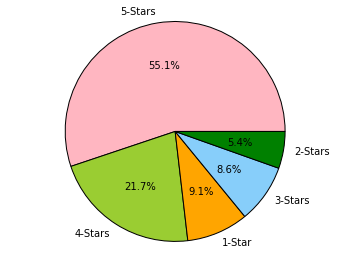

In [218]:
labels = '5-Stars', '4-Stars', '1-Star', '3-Stars', '2-Stars'
sizes = reviews_dataset["stars"].value_counts()
colors = ['lightpink', 'yellowgreen', 'orange', 'lightskyblue','green']
 
# Plot
plt.pie(sizes, labels=labels, colors =colors, autopct='%1.1f%%') 
plt.axis('equal')
plt.show()

In [16]:
#  imbalanced data set
## How to handle problem of imbalance ??

In [219]:
#Select 1 other approach;

## 2nd approach is - splitting into training and test... randomly but in equal proportion..
## and applying cross validation on top of it..

## Approach 1 - Using imbalanced data as it is.

### Loading clean data into texts list

In [220]:
%%time
# we're interested in the text of each review 
# and the stars rating, so we load these into 
# separate lists

texts = []
stars = [reviews_dataset['stars'] for review in reviews_dataset]
pbar = tqdm(total=reviews_dataset.shape[0]+1)
for index, row in reviews_dataset.iterrows():
    texts.append(get_clean_text(row['text']))
    pbar.update(1)
pbar.close()

A Jupyter Widget

Exception in thread Thread-8:
Traceback (most recent call last):
  File "G:\ProgramFiles\Anaconda3\lib\threading.py", line 916, in _bootstrap_inner
    self.run()
  File "G:\ProgramFiles\Anaconda3\lib\site-packages\tqdm\_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "G:\ProgramFiles\Anaconda3\lib\_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration




Wall time: 1min 42s


In [223]:
# Vectorizing our Text Data - the TF-IDF algorithm along with n-grams
# and tokenization (splitting the text into individual words).

In [224]:
# show word clouds here 

In [225]:
%%time

from sklearn.feature_extraction.text import TfidfVectorizer

# This vectorizer breaks text into single words and bi-grams
# and then calculates the TF-IDF representation
vectorizer = TfidfVectorizer(ngram_range=(1,3))

# the 'fit' builds up the vocabulary from all the reviews
# while the 'transform' step turns each indivdual text into
# a matrix of numbers.
vectors = vectorizer.fit_transform(texts)

Wall time: 25.6 s


## Creating a Train/Test Data

In [226]:
# random sampling ?
# cross-validation ?

In [227]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(vectors, stars[1], test_size=0.20, random_state=42)

In [228]:
# We now have a third of our data in X_test and y_test. We’ll teach our system using two-thirds
# of the data (X_train and y_train), and then see how well it does by comparing its predictions for 
# the reviews in X_test with the real ratings in y_test.

### Fitting a Classifier and Making Predictions
The classifier we’ll use is a Linear Support Vector Machine (SVM), 
which has been shown to perform well on several text classifications tasks.

In [229]:
%%time

from sklearn.svm import LinearSVC

# initialise the SVM classifier
classifier = LinearSVC()

# train the classifier
classifier.fit(X_train, y_train)

Wall time: 11.6 s


In [230]:
# classifier has been fitted, it can now be used to make predictions. 
# predicting the rating for the first ten reviews in our test set

In [231]:
preds = classifier.predict(X_test)
print(list(preds[:10]))
print(y_test[:10])

[5, 5, 1, 5, 1, 5, 5, 4, 4, 5]
152551    5
7765      5
83959     1
115550    4
127902    1
63793     5
117637    5
34481     5
55166     4
49846     2
Name: stars, dtype: int64


### Evaluating our Classifier

In [232]:
# simplest method for evaluating such a system is to see the percentage of the time it accurately predicts the desired answer. 
# This method is unsurprisingly called accuracy. We can calculate the accuracy of our system by comparing the predicted reviews 
# and the real reviews–when they are the same, our classifier predicted the review correctly.
# We sum up all of the correct answers and divide by the total number of reviews in our test set. 
# If this number is equal to 1, it means our classifier was spot on every time.

In [233]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, preds))

0.689382189479


In [234]:
from sklearn.metrics import classification_report
print(classification_report(y_test, preds))

             precision    recall  f1-score   support

          1       0.71      0.80      0.75      2833
          2       0.49      0.17      0.26      1650
          3       0.51      0.32      0.39      2549
          4       0.50      0.29      0.37      6841
          5       0.74      0.93      0.83     17075

avg / total       0.65      0.69      0.65     30948



In [235]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, preds))

[[ 2260   129    94   105   245]
 [  591   288   359   187   225]
 [  212   137   819   741   640]
 [   72    23   293  2011  4442]
 [   55     7    55  1001 15957]]


## remodelling the problem for +ve / -ve sentiment

In [236]:
# making binary classes
sentiments = []
for star in stars[1]:
    if star <= 3:
        sentiments.append('n')
    if star > 3:
        sentiments.append('p')

print(len(sentiments))        
        
## to see the effect without including 3, we need to undersample

154737


In [237]:
%%time

vectorizer2 = TfidfVectorizer(ngram_range=(1,3))
vectors2 = vectorizer2.fit_transform(texts)
X2_train, X2_test, y2_train, y2_test = train_test_split(vectors, sentiments, test_size=0.20, random_state=42)

Wall time: 25.4 s


In [238]:
%%time

classifier2 = LinearSVC()
# train the classifier
classifier2.fit(X2_train, y2_train)

Wall time: 2.31 s


In [239]:
preds2 = classifier2.predict(X2_test)
print(list(preds2[:10]))
print(y2_test[:10])

['p', 'p', 'n', 'p', 'n', 'p', 'p', 'p', 'n', 'p']
['p', 'p', 'n', 'p', 'n', 'p', 'p', 'p', 'p', 'n']


In [240]:
print(accuracy_score(y2_test, preds2))

0.926392658653


In [241]:
print(classification_report(y2_test, preds2))

             precision    recall  f1-score   support

          n       0.89      0.77      0.83      7032
          p       0.94      0.97      0.95     23916

avg / total       0.93      0.93      0.92     30948



In [242]:
print(confusion_matrix(y2_test, preds2))

[[ 5416  1616]
 [  662 23254]]


In [243]:
import itertools

names = ['review text', 'sentiment']

matplotlib.rc('figure', figsize=(6, 6))
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')


Confusion matrix, without normalization
[[ 5416  1616]
 [  662 23254]]


Normalized confusion matrix
[[ 0.77  0.23]
 [ 0.03  0.97]]


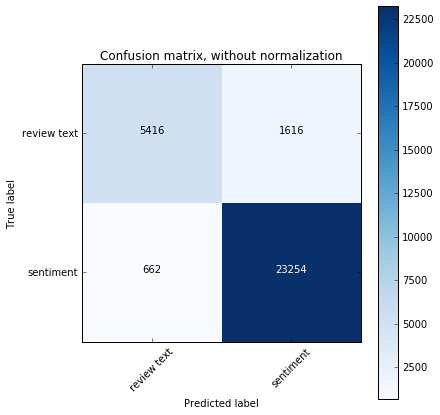

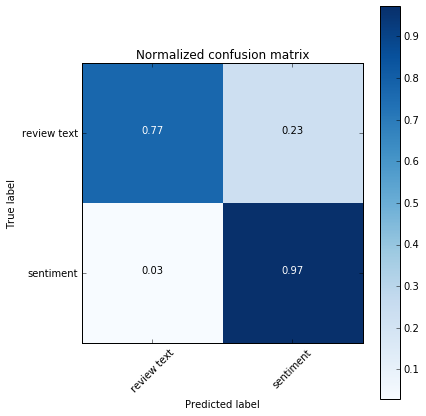

In [244]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y2_test, preds2)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

## 2nd approach -  Undersampling to handle imbalanced data

In [245]:
# 1st approach:
# Simple undersampling will drop some 5-4-3-1 star reviews at random, to give a balanced dataset

In [246]:
def balance_classes(xs, ys):
    """
    Undersample xs, ys to balance classes.
    """
    freqs = Counter(ys)
    # the least common class is the maximum number we want for all classes
    max_allowable = freqs.most_common()[-1][1]
    num_added = {clss: 0 for clss in freqs.keys()}
    new_ys = []
    new_xs = []
    for i, y in enumerate(ys):
        if num_added[y] < max_allowable:
            new_ys.append(y)
            new_xs.append(xs[i])
        num_added[y] += 1
    return new_xs, new_ys

In [247]:
print("Unbalanced dataset : ",Counter(stars[1]))
balanced_x, balanced_y = balance_classes(texts, stars[1])
print("Balanced dataset   : ",Counter(balanced_y))

Unbalanced dataset :  Counter({5: 85332, 4: 33569, 1: 14055, 3: 13382, 2: 8399})
Balanced dataset   :  Counter({4: 8399, 1: 8399, 5: 8399, 3: 8399, 2: 8399})


In [248]:
%%time

# This vectorizer breaks text into single words and bi-grams
# and then calculates the TF-IDF representation
vectorizer3 = TfidfVectorizer(ngram_range=(1,3))

# the 'fit' builds up the vocabulary from all the reviews
# while the 'transform' step turns each indivdual text into
# a matrix of numbers.
vectors3 = vectorizer3.fit_transform(balanced_x)

Wall time: 6.3 s


In [249]:
from sklearn.model_selection import train_test_split
X3_train, X3_test, y3_train, y3_test = train_test_split(vectors3, balanced_y, test_size=0.20, random_state=42)

In [250]:
%%time

# initialise the SVM classifier
classifier3 = LinearSVC()

# train the classifier
classifier3.fit(X3_train, y3_train)

Wall time: 2.81 s


In [253]:
preds3 = classifier3.predict(X3_test)
print(list(preds3[:10]))
print(y3_test[:10])

[3, 3, 2, 5, 1, 5, 2, 1, 3, 3]
[3, 4, 3, 5, 2, 1, 2, 3, 1, 4]


In [254]:
print(accuracy_score(y3_test, preds3))

0.561733539707


In [255]:
print(classification_report(y3_test, preds3))

             precision    recall  f1-score   support

          1       0.64      0.75      0.69      1697
          2       0.50      0.46      0.48      1633
          3       0.49      0.43      0.46      1653
          4       0.50      0.41      0.45      1728
          5       0.63      0.75      0.68      1688

avg / total       0.55      0.56      0.55      8399



In [256]:
print(confusion_matrix(y3_test, preds3))

[[1268  302   80   19   28]
 [ 464  748  328   57   36]
 [ 160  359  715  301  118]
 [  58   71  311  714  574]
 [  24   15   37  339 1273]]
